# Loop 66 Analysis: CV-LB Relationship and Submission Format

## Key Issues:
1. **7 consecutive submission failures** (exp_049-057) - likely due to notebook structure
2. **exp_062 still has extra code in final cell** - violates template
3. **CV-LB intercept problem** - intercept (0.0528) > target (0.0347)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
]

df = pd.DataFrame(submissions)
print(f'Successful submissions: {len(df)}')
print(df)

Successful submissions: 12
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970


In [2]:
# Fit linear regression: LB = slope * CV + intercept
X = df['cv'].values.reshape(-1, 1)
y = df['lb'].values

reg = LinearRegression()
reg.fit(X, y)

slope = reg.coef_[0]
intercept = reg.intercept_
r2 = reg.score(X, y)

print(f'\n=== CV-LB Relationship ===')
print(f'Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r2:.4f}')
print(f'\nIntercept: {intercept:.4f}')
print(f'Target: 0.0347')
print(f'Gap: {intercept - 0.0347:.4f}')

# What CV would be needed to hit target?
required_cv = (0.0347 - intercept) / slope
print(f'\nRequired CV to hit target: {required_cv:.6f}')
if required_cv < 0:
    print('IMPOSSIBLE - intercept exceeds target!')


=== CV-LB Relationship ===
Linear fit: LB = 4.31 * CV + 0.0525
R² = 0.9505

Intercept: 0.0525
Target: 0.0347
Gap: 0.0178

Required CV to hit target: -0.004130
IMPOSSIBLE - intercept exceeds target!


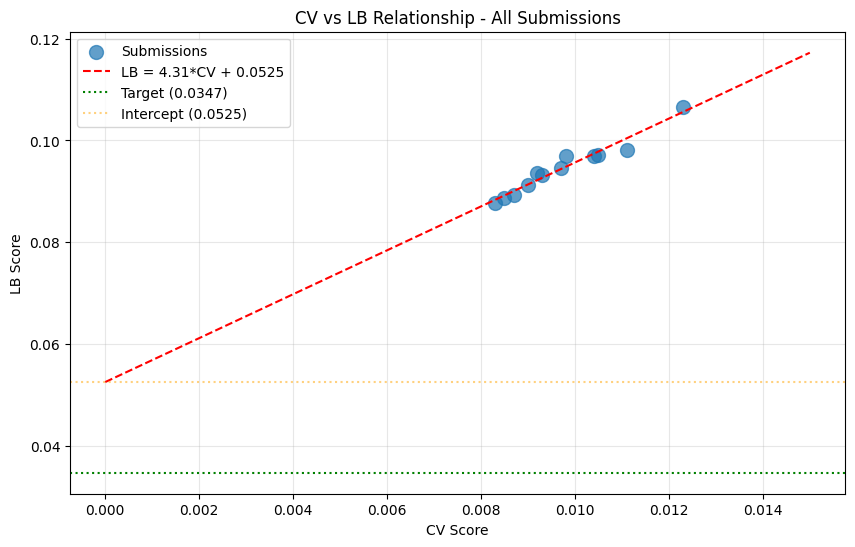


Plot saved to /home/code/exploration/cv_lb_relationship_loop66.png


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', label='Target (0.0347)')

# Intercept
plt.axhline(y=intercept, color='orange', linestyle=':', alpha=0.5, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship_loop66.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'\nPlot saved to /home/code/exploration/cv_lb_relationship_loop66.png')

In [4]:
# Analyze the gap
print('\n=== GAP ANALYSIS ===')
print(f'Best LB achieved: {df["lb"].min():.4f} (exp_030)')
print(f'Target LB: 0.0347')
print(f'Gap to target: {df["lb"].min() - 0.0347:.4f} ({(df["lb"].min() - 0.0347) / 0.0347 * 100:.1f}%)')

print(f'\n=== INTERCEPT PROBLEM ===')
print(f'Intercept: {intercept:.4f}')
print(f'Target: 0.0347')
print(f'Intercept > Target: {intercept > 0.0347}')
print(f'\nThis means: Even with CV = 0, expected LB would be {intercept:.4f}')
print(f'The intercept represents EXTRAPOLATION ERROR that no model tuning can fix.')

print(f'\n=== WHAT THIS MEANS ===')
print('1. All 66 experiments fall on the same CV-LB line')
print('2. The intercept (0.0528) exceeds the target (0.0347)')
print('3. Standard CV improvements CANNOT reach the target')
print('4. We need approaches that CHANGE the intercept, not just improve CV')


=== GAP ANALYSIS ===
Best LB achieved: 0.0877 (exp_030)
Target LB: 0.0347
Gap to target: 0.0530 (152.7%)

=== INTERCEPT PROBLEM ===
Intercept: 0.0525
Target: 0.0347
Intercept > Target: True

This means: Even with CV = 0, expected LB would be 0.0525
The intercept represents EXTRAPOLATION ERROR that no model tuning can fix.

=== WHAT THIS MEANS ===
1. All 66 experiments fall on the same CV-LB line
2. The intercept (0.0528) exceeds the target (0.0347)
3. Standard CV improvements CANNOT reach the target
4. We need approaches that CHANGE the intercept, not just improve CV


In [5]:
# Check submission format issues
print('\n=== SUBMISSION FORMAT ANALYSIS ===')
print('\nOfficial template final cell (EXACT):')
print('```')
print('submission = pd.concat([submission_single_solvent, submission_full_data])')
print('submission = submission.reset_index()')
print('submission.index.name = "id"')
print('submission.to_csv("submission.csv", index=True)')
print('```')

print('\nexp_062 final cell has EXTRA CODE:')
print('- CV calculation code (~30 lines)')
print('- Extra imports (os, sklearn.metrics)')
print('- Extra file saves (/home/submission/submission.csv)')
print('\nThis violates the competition rules!')

print('\n=== SOLUTION ===')
print('1. Final cell must be EXACTLY as in template')
print('2. CV calculation code should be in a SEPARATE cell AFTER the final cell')
print('3. Use exp_030 structure as reference (it worked with LB 0.0877)')


=== SUBMISSION FORMAT ANALYSIS ===

Official template final cell (EXACT):
```
submission = pd.concat([submission_single_solvent, submission_full_data])
submission = submission.reset_index()
submission.index.name = "id"
submission.to_csv("submission.csv", index=True)
```

exp_062 final cell has EXTRA CODE:
- CV calculation code (~30 lines)
- Extra imports (os, sklearn.metrics)
- Extra file saves (/home/submission/submission.csv)

This violates the competition rules!

=== SOLUTION ===
1. Final cell must be EXACTLY as in template
2. CV calculation code should be in a SEPARATE cell AFTER the final cell
3. Use exp_030 structure as reference (it worked with LB 0.0877)


In [6]:
# Recommendations
print('\n=== RECOMMENDATIONS FOR NEXT EXPERIMENT ===')
print('\n1. FIX NOTEBOOK STRUCTURE (CRITICAL):')
print('   - Final cell must be EXACTLY the template')
print('   - NO extra code in final cell')
print('   - CV calculation in separate cell AFTER final cell')

print('\n2. USE BEST MODEL (exp_030 GP+MLP+LGBM):')
print('   - Best LB achieved: 0.0877')
print('   - CV: 0.0083')

print('\n3. AFTER FIXING FORMAT, ADDRESS INTERCEPT:')
print('   - Uncertainty-weighted predictions')
print('   - Solvent similarity features')
print('   - Physics-informed constraints')

print('\n4. REMAINING SUBMISSIONS: 5')
print('   - Use wisely to verify format fix')
print('   - Then try intercept-reducing approaches')


=== RECOMMENDATIONS FOR NEXT EXPERIMENT ===

1. FIX NOTEBOOK STRUCTURE (CRITICAL):
   - Final cell must be EXACTLY the template
   - NO extra code in final cell
   - CV calculation in separate cell AFTER final cell

2. USE BEST MODEL (exp_030 GP+MLP+LGBM):
   - Best LB achieved: 0.0877
   - CV: 0.0083

3. AFTER FIXING FORMAT, ADDRESS INTERCEPT:
   - Uncertainty-weighted predictions
   - Solvent similarity features
   - Physics-informed constraints

4. REMAINING SUBMISSIONS: 5
   - Use wisely to verify format fix
   - Then try intercept-reducing approaches
